In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-dataset-with/Ifood_new.csv


In [2]:
import pandas as pd

# Load the CSV file into a dataframe
df = pd.read_csv('/kaggle/input/indian-food-dataset-with/Ifood_new.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East,https://www.crazymasalafood.com/wp-content/ima...
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
3,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
4,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...


In [3]:
# Counting the number of dishes by region
region_counts = df['region'].value_counts()

region_counts


West          73
South         58
North         50
East          32
North East    25
-1            13
Central        3
Name: region, dtype: int64

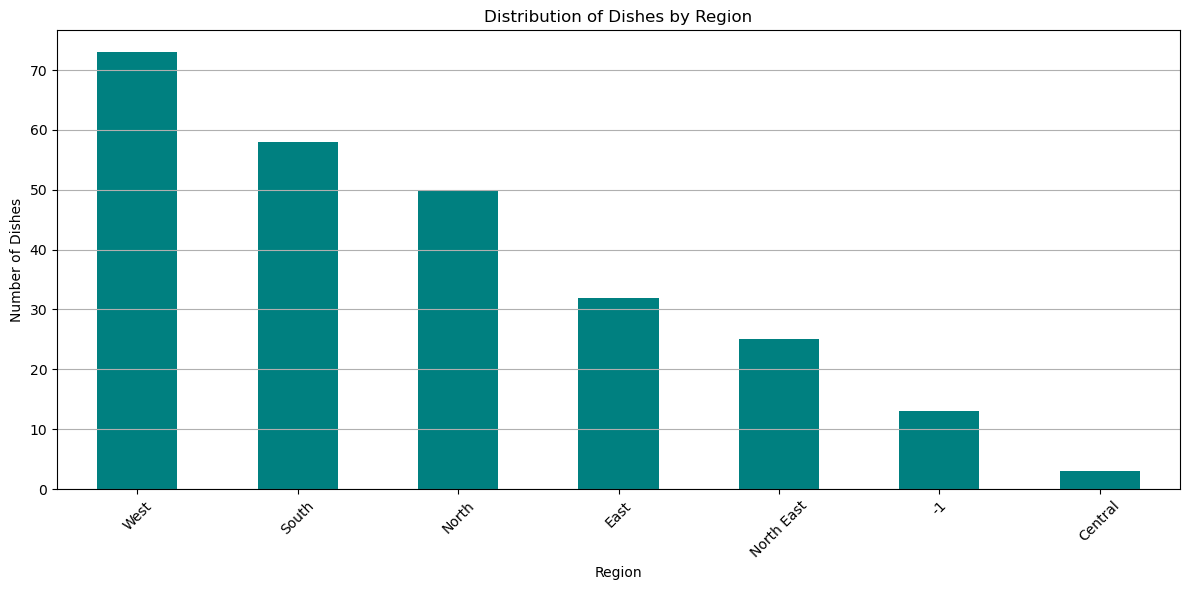

In [4]:
import matplotlib.pyplot as plt

# Plotting the distribution by region
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Dishes by Region')
plt.xlabel('Region')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Dropdown widget for dietary preference
diet_dropdown = widgets.Dropdown(
    options=['All', 'vegetarian', 'non-vegetarian'],
    value='All',
    description='Diet:',
)

# Dropdown widget for flavor profile
flavor_dropdown = widgets.Dropdown(
    options=['All'] + df['flavor_profile'].unique().tolist(),
    value='All',
    description='Flavor:',
)

# Output widget to display the filtered dishes
output = widgets.Output()

# Function to filter and display dishes based on selected preferences
def display_dishes(change):
    with output:
        clear_output(wait=True)
        
        # Filtering the dataframe based on selected preferences
        filtered_df = df.copy()
        if diet_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['diet'] == diet_dropdown.value]
        if flavor_dropdown.value != 'All':
            filtered_df = filtered_df[filtered_df['flavor_profile'] == flavor_dropdown.value]
        
        # Displaying the filtered dishes
        if filtered_df.empty:
            print("No dishes found with the selected filters!")
        else:
            display(filtered_df[['name', 'ingredients', 'state', 'region']])
        
# Adding observers to the dropdown widgets to call the function when value changes
diet_dropdown.observe(display_dishes, names='value')
flavor_dropdown.observe(display_dishes, names='value')

# Displaying the widgets
display(diet_dropdown, flavor_dropdown, output)

# Initial display
display_dishes(None)


Dropdown(description='Diet:', options=('All', 'vegetarian', 'non-vegetarian'), value='All')

Dropdown(description='Flavor:', options=('All', 'sweet', 'spicy', 'bitter', '-1', 'sour'), value='All')

Output()

In [6]:
# Displaying a list of dish names for selection
dish_names = df['name'].tolist()
dish_names[:20]  # Displaying the first 20 dishes for brevity


['Adhirasam',
 'Aloo gobi',
 'Aloo matar',
 'Aloo methi',
 'Aloo shimla mirch',
 'Aloo tikki',
 'Alu Pitika',
 'Amti',
 'Anarsa',
 'Ariselu',
 'Attu',
 'Avial',
 'Baingan Fry',
 'Bajri no rotlo',
 'Balu shahi',
 'Bandar laddu',
 'Basundi',
 'Bebinca',
 'Bengena Pitika',
 'Bhakri']

In [7]:
from IPython.display import Image, display_html

# Extracting details for "Adhirasam"
dish_details = df[df['name'] == 'Adhirasam'].iloc[0]

# Displaying details
details_html = f"""
<table>
    <tr><th>Name:</th><td>{dish_details['name']}</td></tr>
    <tr><th>Ingredients:</th><td>{dish_details['ingredients']}</td></tr>
    <tr><th>Diet:</th><td>{dish_details['diet']}</td></tr>
    <tr><th>Preparation Time:</th><td>{dish_details['prep_time']} minutes</td></tr>
    <tr><th>Cooking Time:</th><td>{dish_details['cook_time']} minutes</td></tr>
    <tr><th>Flavor Profile:</th><td>{dish_details['flavor_profile']}</td></tr>
    <tr><th>Course:</th><td>{dish_details['course']}</td></tr>
    <tr><th>State:</th><td>{dish_details['state']}</td></tr>
    <tr><th>Region:</th><td>{dish_details['region']}</td></tr>
</table>
"""

display_html(details_html, raw=True)
Image(url=dish_details['img_url'], width=300)


Name:,Adhirasam
Ingredients:,"Rice flour, jaggery, ghee, vegetable oil, elachi"
Diet:,vegetarian
Preparation Time:,10 minutes
Cooking Time:,50 minutes
Flavor Profile:,sweet
Course:,dessert
State:,West Bengal
Region:,East


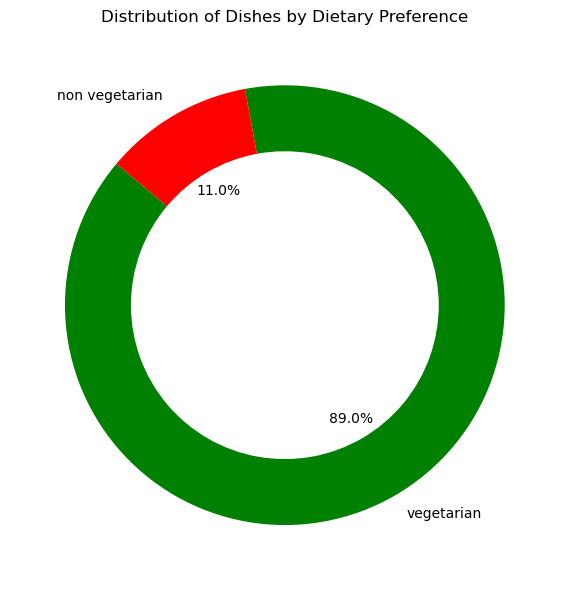

In [8]:
# Counting the number of dishes by dietary preference
diet_counts = df['diet'].value_counts()

# Plotting the distribution by dietary preference
plt.figure(figsize=(8, 6))
diet_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red'], wedgeprops=dict(width=0.3))
plt.title('Distribution of Dishes by Dietary Preference')
plt.ylabel('')  # Removing the default y-label

plt.tight_layout()
plt.show()


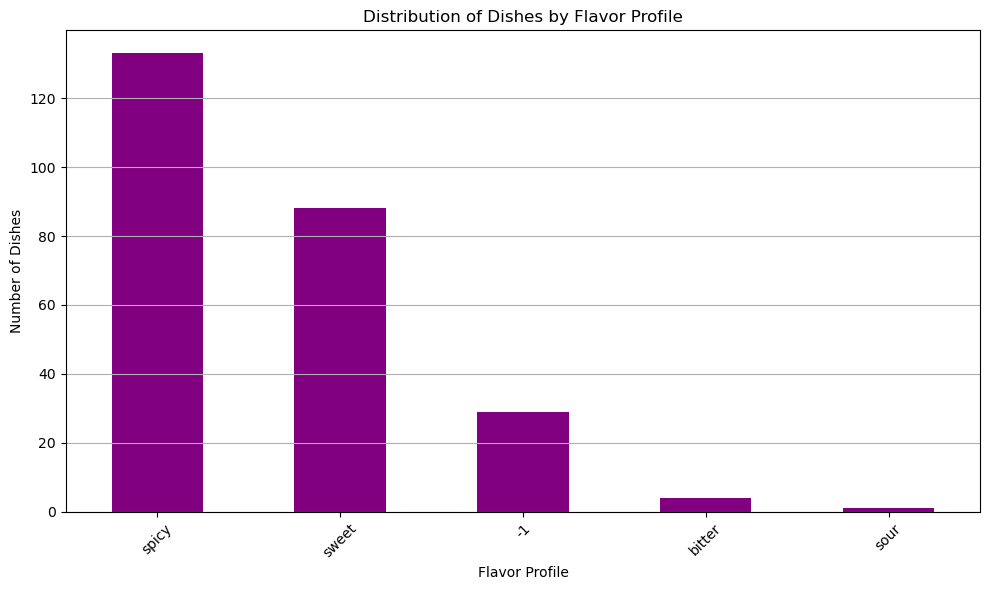

In [9]:
# Counting the number of dishes by flavor profile
flavor_counts = df['flavor_profile'].value_counts()

# Plotting the distribution by flavor profile
plt.figure(figsize=(10, 6))
flavor_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Dishes by Flavor Profile')
plt.xlabel('Flavor Profile')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


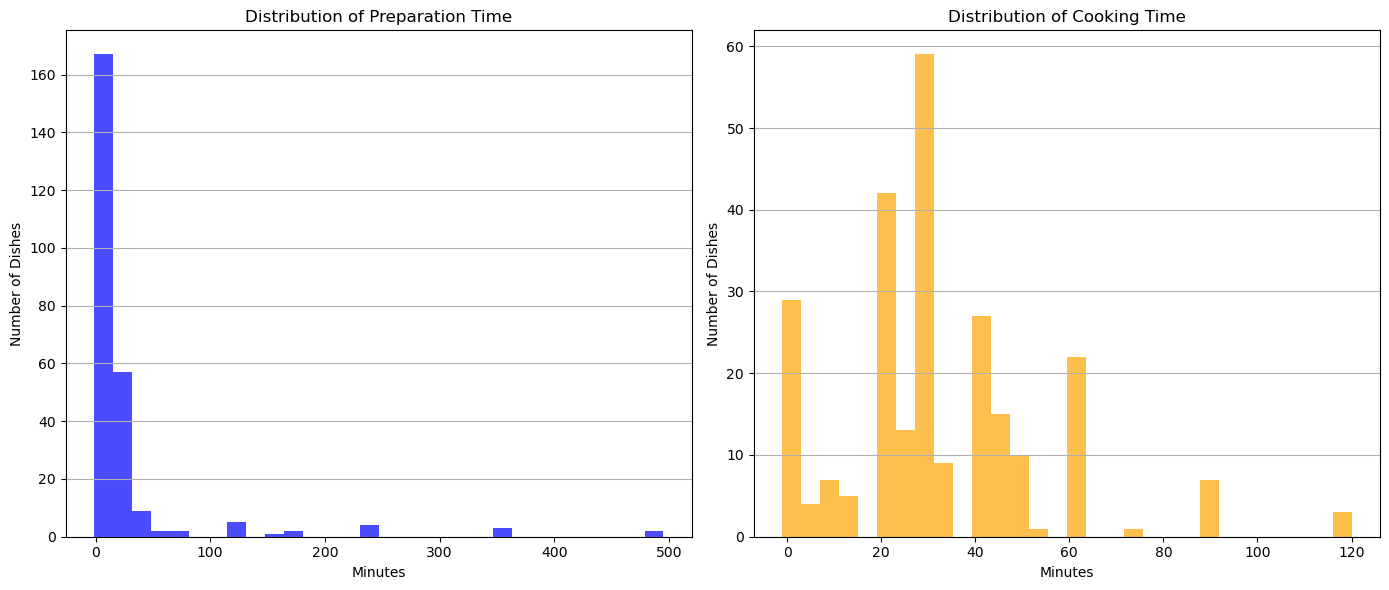

In [10]:
# Plotting distribution of preparation and cooking times
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Removing outliers for a better visualization
filtered_prep_time = df[df['prep_time'] < 500]['prep_time']
filtered_cook_time = df[df['cook_time'] < 500]['cook_time']

ax[0].hist(filtered_prep_time, bins=30, color='blue', alpha=0.7)
ax[0].set_title('Distribution of Preparation Time')
ax[0].set_xlabel('Minutes')
ax[0].set_ylabel('Number of Dishes')
ax[0].grid(axis='y')

ax[1].hist(filtered_cook_time, bins=30, color='orange', alpha=0.7)
ax[1].set_title('Distribution of Cooking Time')
ax[1].set_xlabel('Minutes')
ax[1].set_ylabel('Number of Dishes')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()


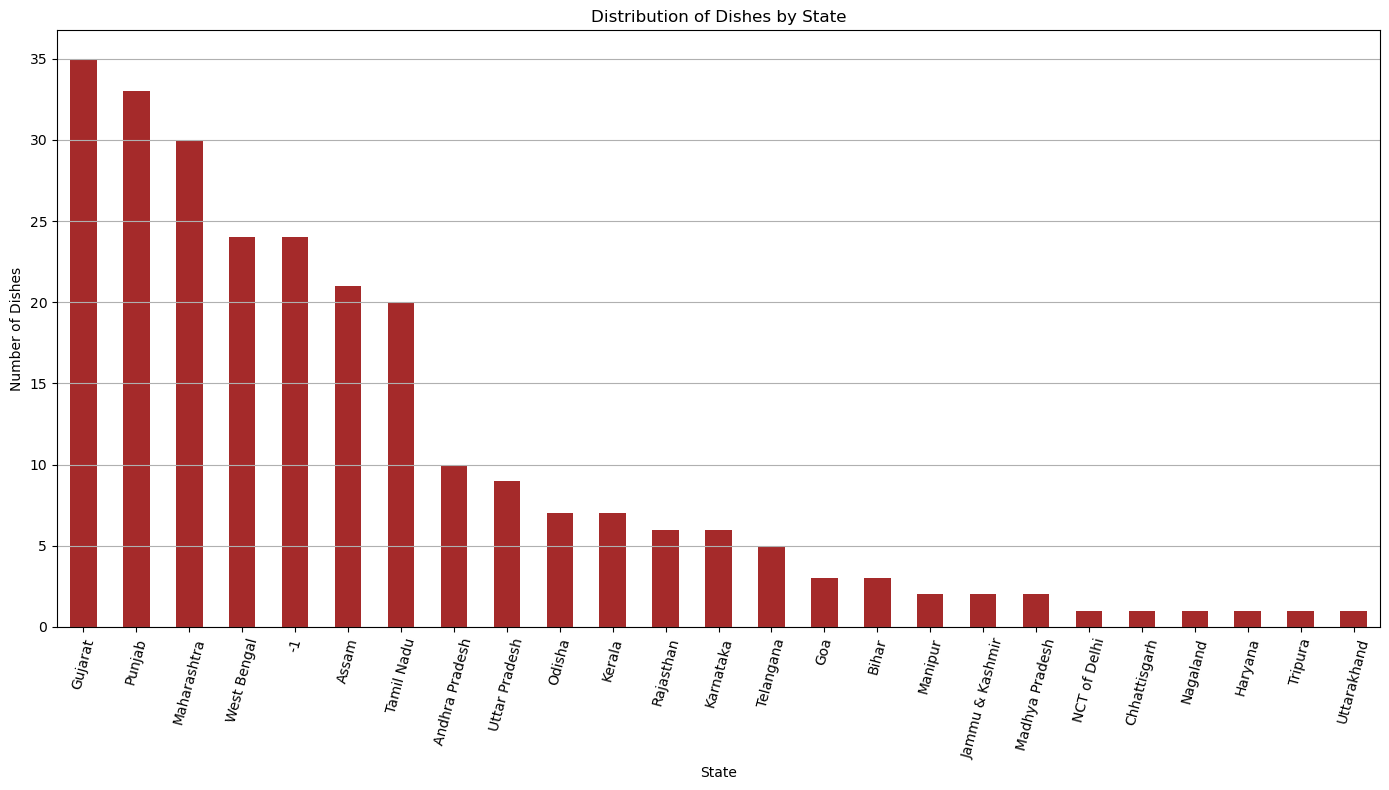

In [11]:
# Counting the number of dishes by state
state_counts = df['state'].value_counts()

# Plotting the distribution by state
plt.figure(figsize=(14, 8))
state_counts.plot(kind='bar', color='brown')
plt.title('Distribution of Dishes by State')
plt.xlabel('State')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=75)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


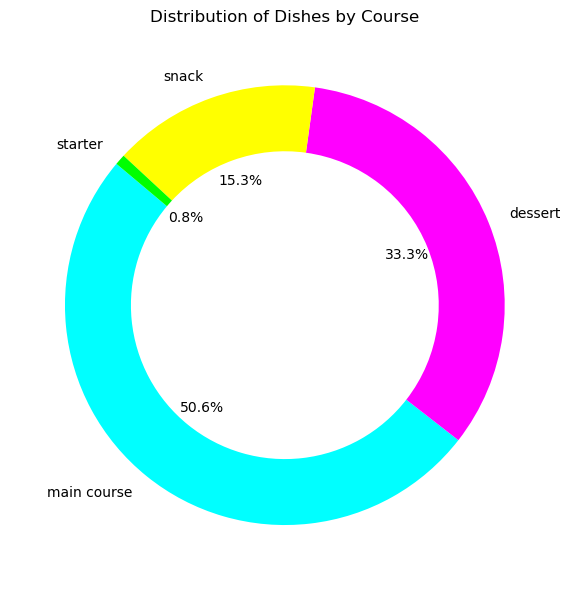

In [12]:
# Counting the number of dishes by course
course_counts = df['course'].value_counts()

# Plotting the distribution by course
plt.figure(figsize=(10, 6))
course_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['cyan', 'magenta', 'yellow', 'lime'], wedgeprops=dict(width=0.3))
plt.title('Distribution of Dishes by Course')
plt.ylabel('')  # Removing the default y-label

plt.tight_layout()
plt.show()


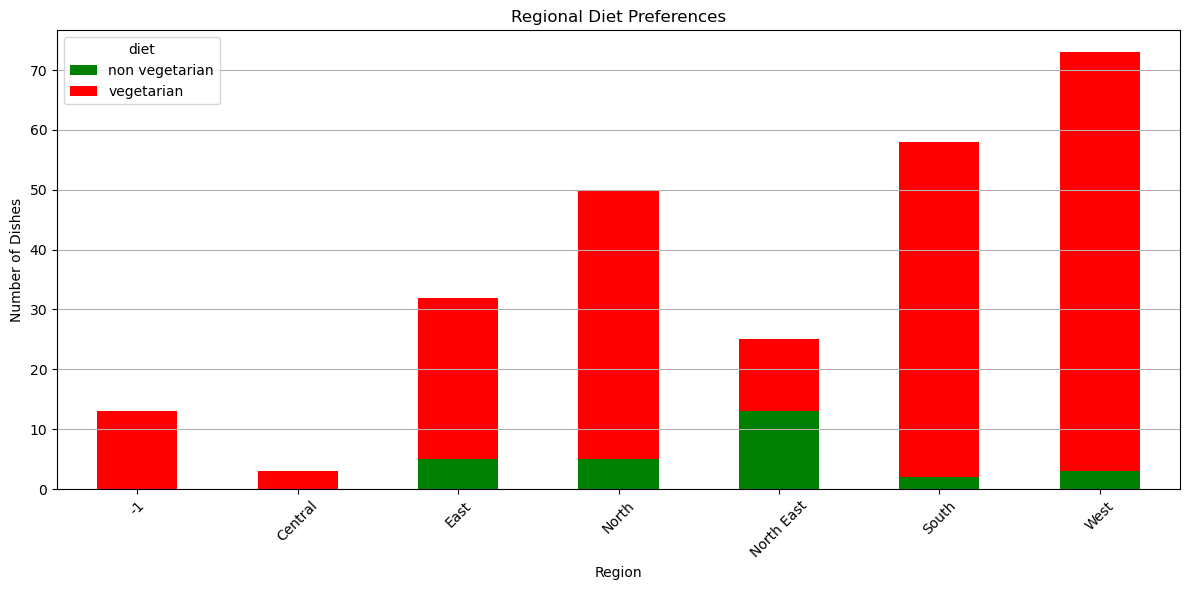

In [13]:
# Grouping by region and diet to get the counts
regional_diet_counts = df.groupby(['region', 'diet']).size().unstack().fillna(0)

# Plotting the distribution of diet preferences by region
regional_diet_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red'])
plt.title('Regional Diet Preferences')
plt.xlabel('Region')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


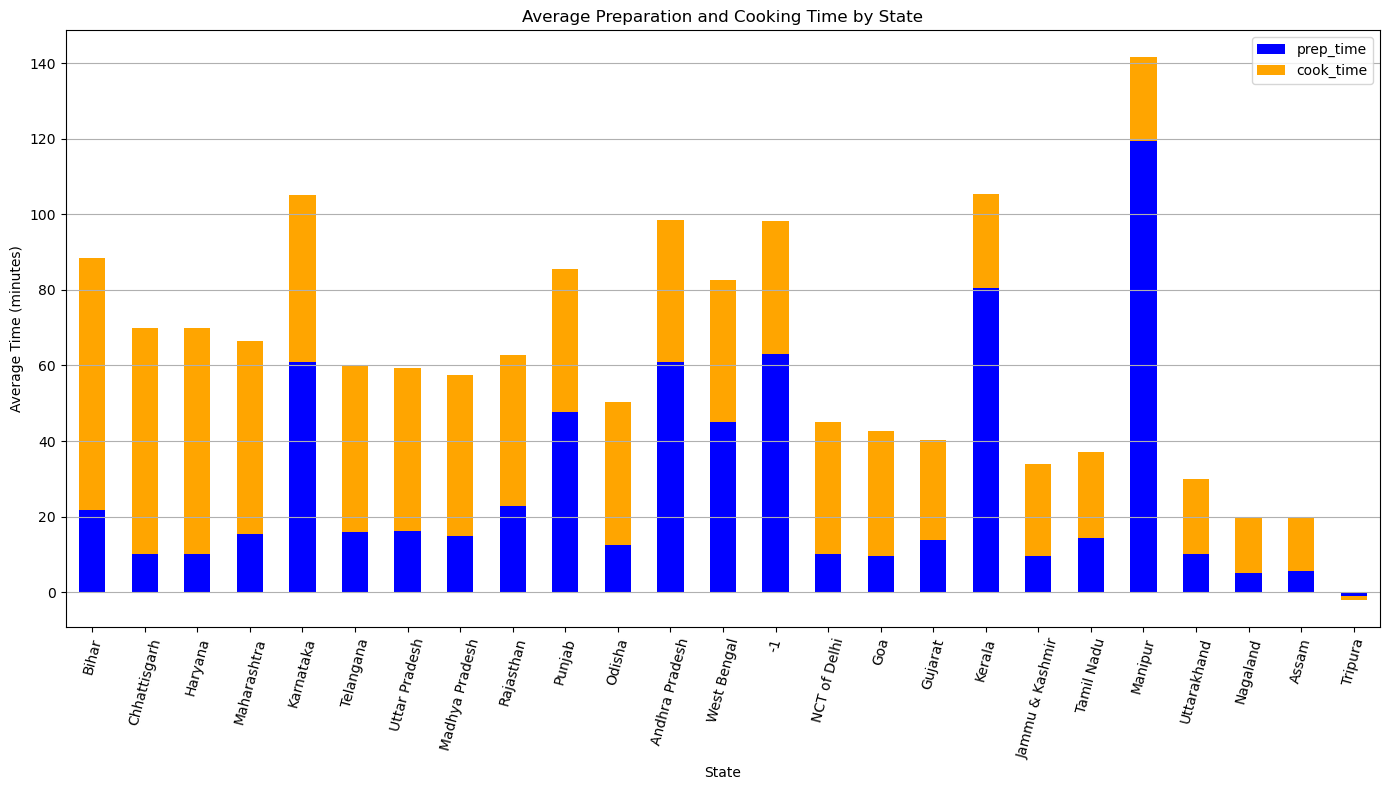

In [14]:
# Calculating average preparation and cooking times by state
avg_times = df.groupby('state')[['prep_time', 'cook_time']].mean().sort_values(by='cook_time', ascending=False)

# Plotting average preparation and cooking times by state
fig, ax = plt.subplots(figsize=(14, 8))
avg_times.plot(kind='bar', ax=ax, color=['blue', 'orange'], stacked=True)
plt.title('Average Preparation and Cooking Time by State')
plt.xlabel('State')
plt.ylabel('Average Time (minutes)')
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


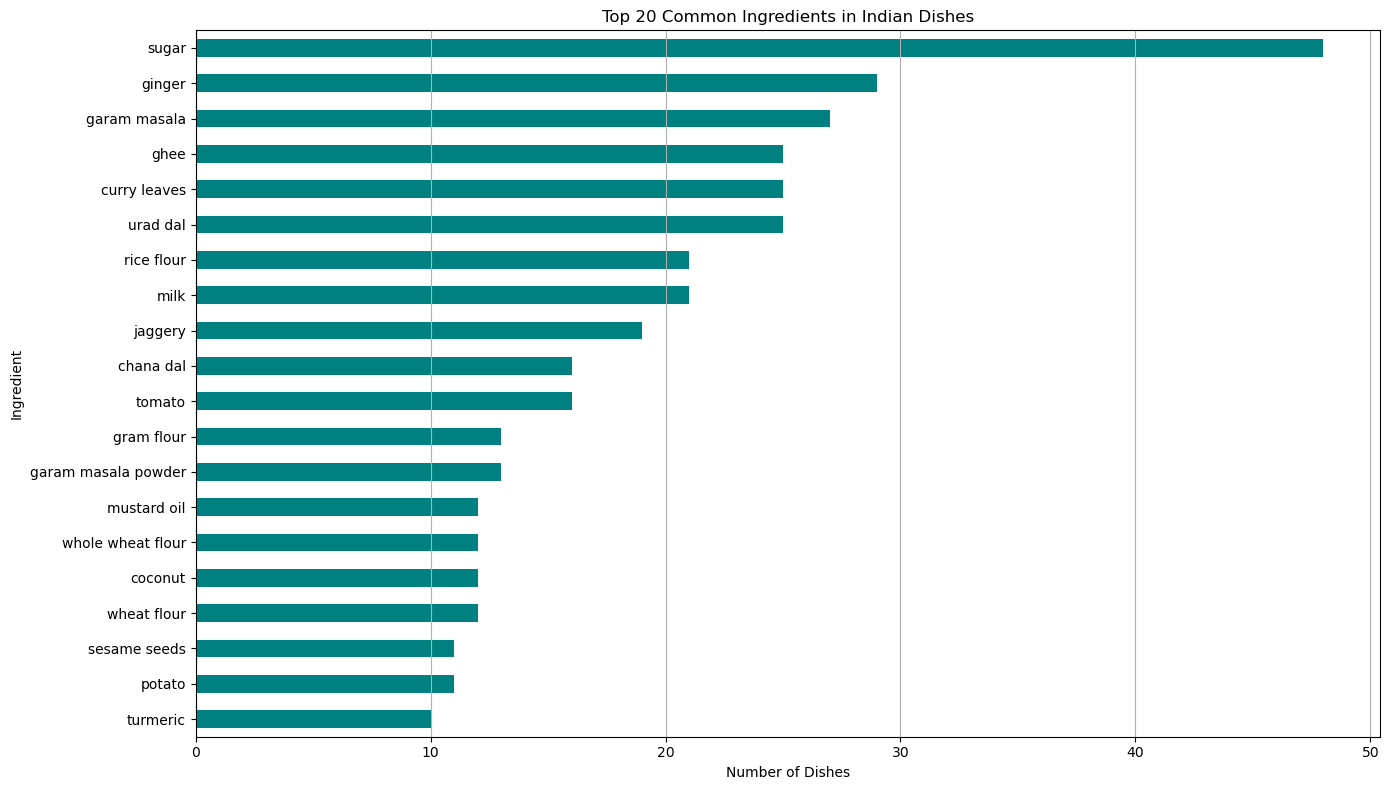

In [15]:
from collections import Counter

# Extracting and counting ingredients
ingredients_list = df['ingredients'].str.lower().str.split(', ').sum()
ingredients_count = Counter(ingredients_list)

# Getting the top 20 most common ingredients
top_ingredients = pd.DataFrame(ingredients_count.most_common(20), columns=['Ingredient', 'Count'])

# Plotting the top 20 ingredients
plt.figure(figsize=(14, 8))
top_ingredients.set_index('Ingredient')['Count'].sort_values().plot(kind='barh', color='teal')
plt.title('Top 20 Common Ingredients in Indian Dishes')
plt.xlabel('Number of Dishes')
plt.ylabel('Ingredient')
plt.grid(axis='x')

plt.tight_layout()
plt.show()


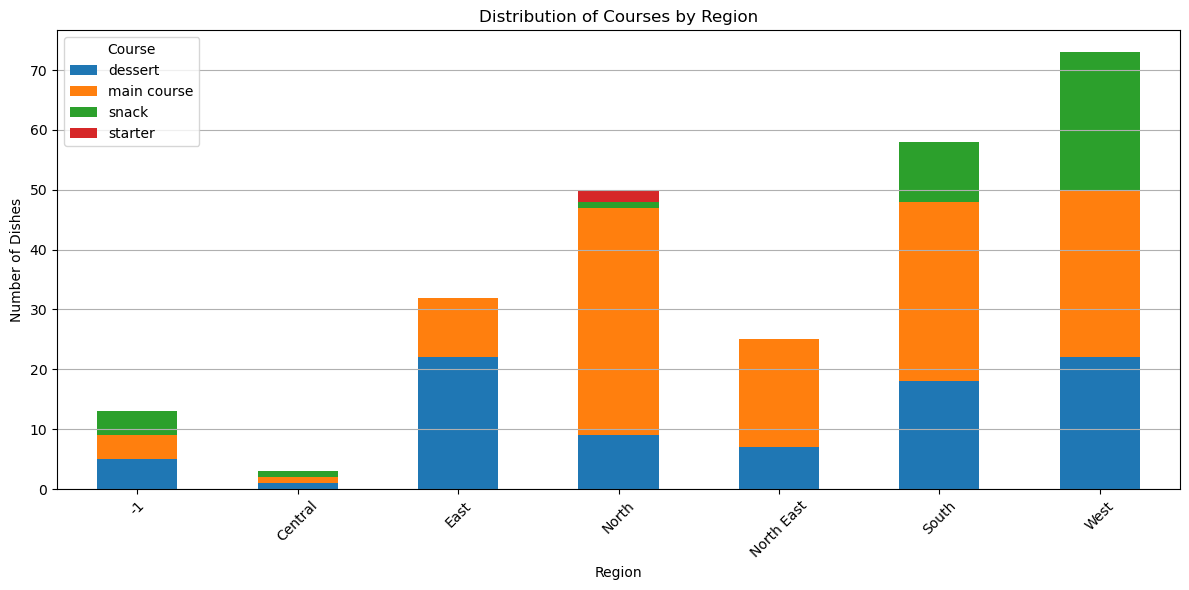

In [16]:
# Grouping by region and course to get the counts
region_course_counts = df.groupby(['region', 'course']).size().unstack().fillna(0)

# Plotting the distribution of courses by region
region_course_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Courses by Region')
plt.xlabel('Region')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Course')
plt.tight_layout()

plt.show()


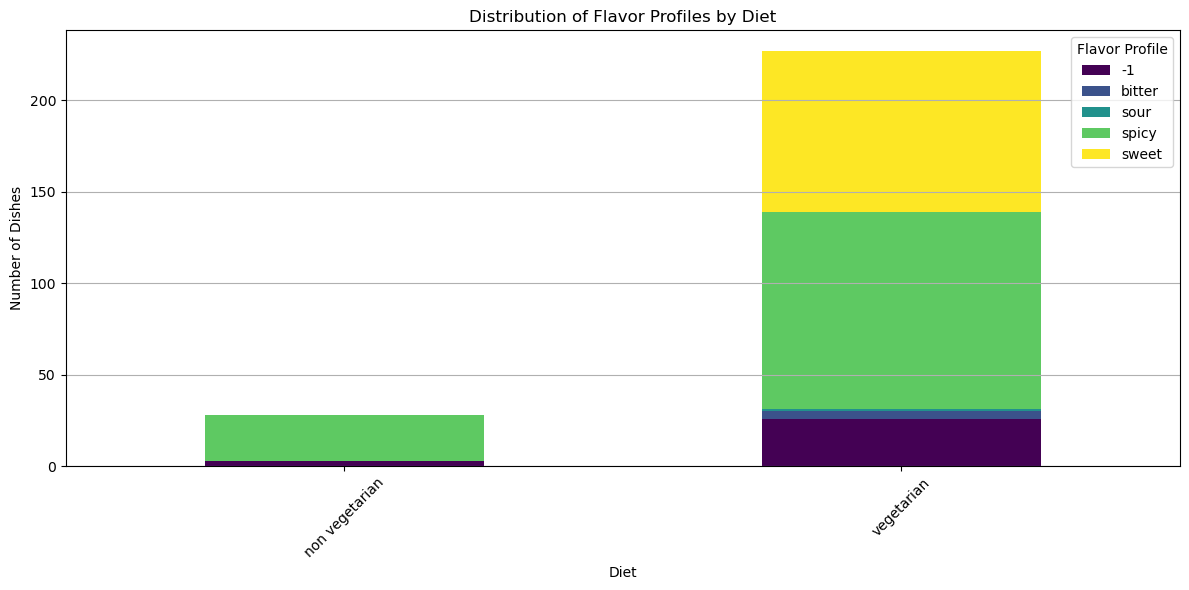

In [17]:
# Grouping by diet and flavor profile to get the counts
diet_flavor_counts = df.groupby(['diet', 'flavor_profile']).size().unstack().fillna(0)

# Plotting the distribution of flavor profiles by diet
diet_flavor_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribution of Flavor Profiles by Diet')
plt.xlabel('Diet')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Flavor Profile')
plt.tight_layout()

plt.show()


In [18]:
# Selecting top 5 ingredients for analysis
top_5_ingredients = top_ingredients['Ingredient'].head(5)

# Finding dishes that contain these top ingredients
popular_dishes = {}

for ingredient in top_5_ingredients:
    popular_dishes[ingredient] = df[df['ingredients'].str.contains(ingredient, case=False)]['name'].tolist()

# Displaying dishes for the top 5 ingredients
popular_dishes_df = pd.DataFrame.from_dict(popular_dishes, orient='index').transpose()
popular_dishes_df


,sugar,ginger,garam masala,ghee,curry leaves
0,Balu shahi,Aloo matar,Aloo gobi,Adhirasam,Aloo gobi
1,Bandar laddu,Attu,Aloo matar,Ariselu,Amti
2,Basundi,Chana masala,Aloo shimla mirch,Bandar laddu,Baingan Fry
3,Boondi,Chicken Varuval,Aloo tikki,Boondi,Currivepillai sadam
4,Chak Hao Kheer,Chingri malai curry,Baingan Fry,Chhena jalebi,Dalithoy
5,Cham cham,Dal tadka,Bhindi masala,Gajar ka halwa,Kadhi pakoda
6,Chevdo,Kabiraji,Bilahi Maas,Gavvalu,Keerai masiyal
7,Chhena jalebi,Kadhi pakoda,Butter chicken,Ghevar,Khandvi
8,Chhena kheeri,Khichdi,Chana masala,Gulab jamun,Kos kootu
9,Chhena poda,Khorisa,Chicken razala,Kaju katli,Koshambri


In [19]:
# Calculating total time as sum of preparation and cooking time
df['total_time'] = df['prep_time'] + df['cook_time']

# Sorting dishes by total time and getting the top 10 most time-consuming dishes
complex_dishes = df[['name', 'prep_time', 'cook_time', 'total_time']].sort_values(by='total_time', ascending=False).head(10)
complex_dishes


,name,prep_time,cook_time,total_time
229,Shrikhand,10,720,730
193,Pindi chana,500,120,620
204,Puttu,495,40,535
156,Misti doi,480,30,510
148,Masala Dosa,360,90,450
65,Dosa,360,90,450
86,Idli,360,90,450
197,Poornalu,240,60,300
31,Chak Hao Kheer,240,45,285
239,Tandoori Fish Tikka,240,30,270


In [20]:
# Calculating the number of ingredients for each dish
df['ingredient_count'] = df['ingredients'].str.split(', ').apply(len)

# Sorting dishes by ingredient count and getting the top 10 with most ingredients
ingredient_complex_dishes = df[['name', 'ingredient_count']].sort_values(by='ingredient_count', ascending=False).head(10)
ingredient_complex_dishes


,name,ingredient_count
76,Ghevar,10
88,Jalebi,9
80,Gulab jamun,8
162,Mysore pak,8
167,Obbattu holige,7
15,Bandar laddu,7
215,Sabudana Khichadi,6
118,Koldil Duck,6
30,Butter chicken,6
143,Maach Jhol,6


In [21]:
# Finding unique ingredients for each state
state_ingredients = df.groupby('state')['ingredients'].apply(lambda x: ', '.join(x)).str.split(', ').apply(set)

unique_ingredients_by_state = {}
all_ingredients = set(ingredients_list)

for state, ingredients in state_ingredients.items():
    unique_ingredients = ingredients - all_ingredients.intersection(ingredients)
    unique_ingredients_by_state[state] = list(unique_ingredients)

# Displaying unique ingredients for each state
unique_ingredients_df = pd.DataFrame.from_dict(unique_ingredients_by_state, orient='index').transpose()
unique_ingredients_df.head(10)  # Displaying the first 10 rows for brevity


,-1,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Karnataka,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,Coconut oil,Whole wheat flour,Flour,Yoghurt,Chana dal,Chicken,Chickpea flour,Besan,Cottage cheese,Sugar,...,Rice,Rice,Potato,Flour,Rice,Loaf bread,Boiled pork,Firm white pumpkin,Khoa,Rice
1,Brown rice,Chana dal,Banana flower,Wheat flour,None,Brown rice,Dry fruits,None,Baby potatoes,Dharwadi buffalo milk,...,None,Sugar,Chickpea flour,Whole wheat flour,Arhar dal,Apricots,None,Whole wheat flour,None,Flour
2,Red pepper,Green moong beans,Ridge gourd,Sattu,None,Coconut milk,Sugar,None,None,Maida flour,...,None,Chenna,Garam masala powder,Moong dal,Urad dal,Rose water,None,Paneer,None,Chicken
3,Sevai,Rice flour,Rice,None,None,None,Green garlic chutney,None,None,Milk,...,None,Chhena,Bitter gourd,Arbi ke patte,Pearl onions,Chicken thighs,None,Corn flour,None,Milk powder
4,Moong dal,Besan,Lamb,None,None,None,Moong beans,None,None,Moong dal,...,None,Curd,Cottage cheese,Gram flour,Chana dal,Vermicelli pudding,None,Green beans,None,Milk
5,Refined flour,Wheat flour,Aloo,None,None,None,Whole wheat rava,None,None,Besan flour,...,None,None,Rice flour,Yogurt,Moong dal,None,None,Bottle gourd,None,Fish fillet
6,Gram flour,None,Rice flour,None,None,None,Ridge gourd,None,None,Split pigeon peas,...,None,None,Cauliflower,None,Amaranth leaves,None,None,Moong dal,None,Maida flour
7,Rice,None,Basmati rice,None,None,None,Citric acid,None,None,Thin rice flakes,...,None,None,Chickpeas,None,Rice flour,None,None,Condensed milk,None,Green beans
8,Split urad dal,None,Fermented bamboo shoot,None,None,None,Bottle gourd,None,None,None,...,None,None,Red kidney beans,None,Sesame oil,None,None,Maida,None,Chhena
9,Bottle gourd,None,Biryani masala,None,None,None,Green chilies,None,None,None,...,None,None,Chicken,None,Meat curry powder,None,None,None,None,Coconut milk


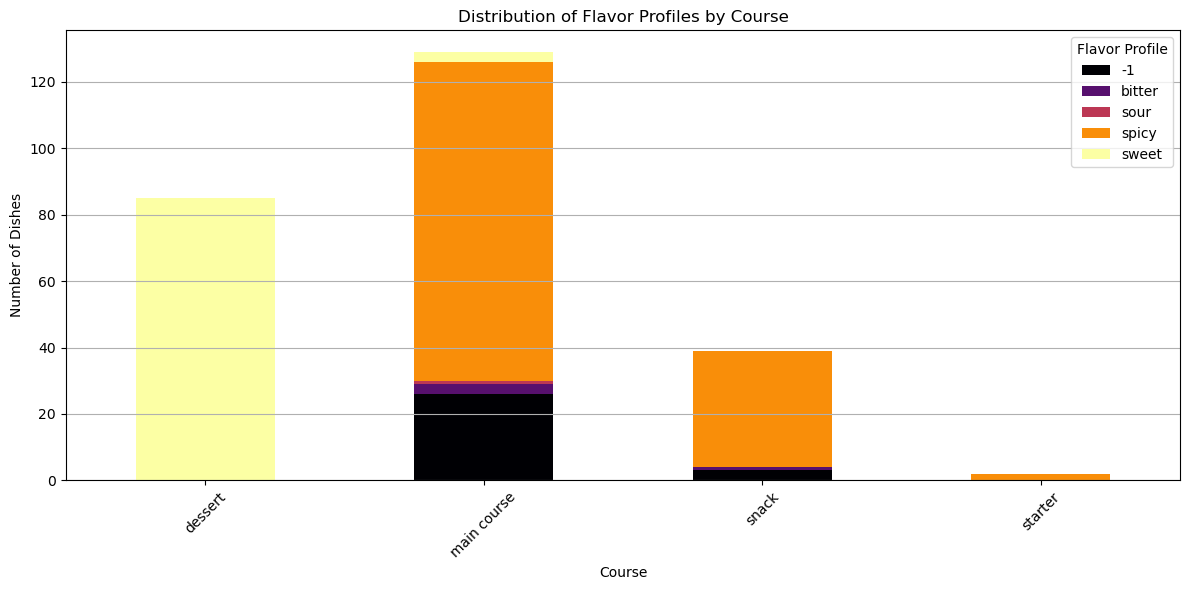

In [22]:
# Grouping by course and flavor profile to get the counts
course_flavor_counts = df.groupby(['course', 'flavor_profile']).size().unstack().fillna(0)

# Plotting the distribution of flavor profiles by course
course_flavor_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='inferno')
plt.title('Distribution of Flavor Profiles by Course')
plt.xlabel('Course')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Flavor Profile')
plt.tight_layout()

plt.show()


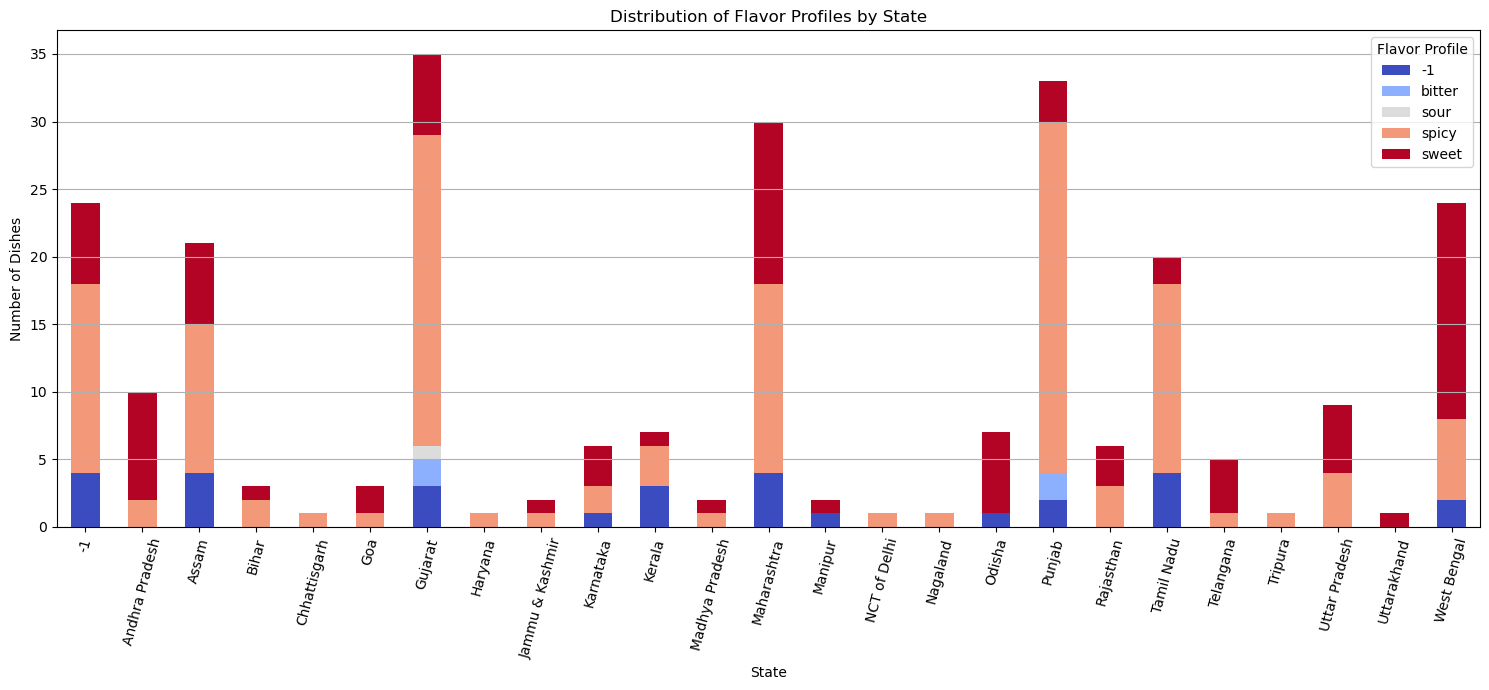

In [23]:
# Grouping by state and flavor profile to get the counts
state_flavor_counts = df.groupby(['state', 'flavor_profile']).size().unstack().fillna(0)

# Plotting the distribution of flavor profiles by state
state_flavor_counts.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='coolwarm')
plt.title('Distribution of Flavor Profiles by State')
plt.xlabel('State')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.legend(title='Flavor Profile')
plt.tight_layout()

plt.show()


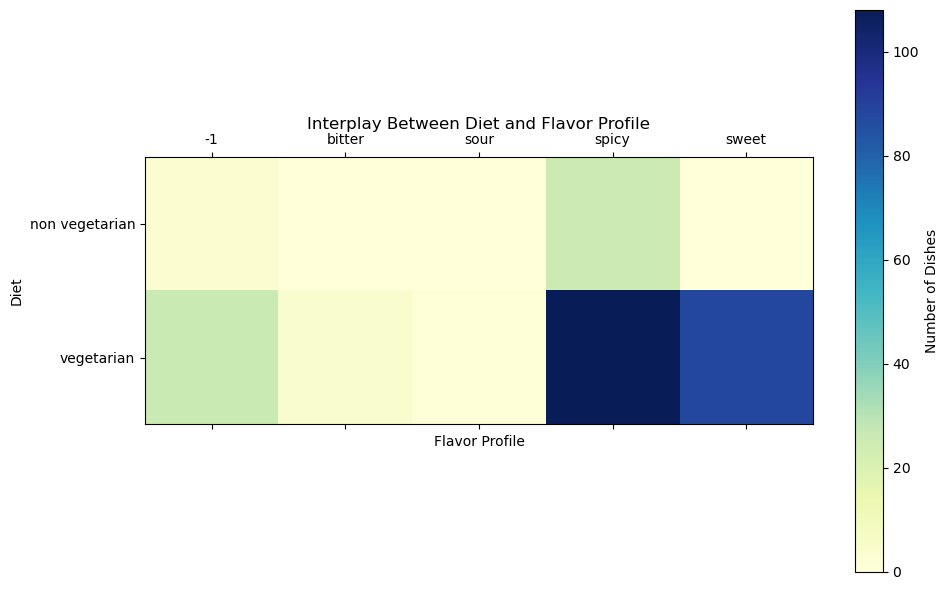

In [24]:
# Grouping by diet and flavor profile to get the counts
diet_flavor_matrix = df.groupby(['diet', 'flavor_profile']).size().unstack().fillna(0)

# Using Matplotlib to visualize the interplay between diet and flavor profile
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(diet_flavor_matrix, cmap='YlGnBu')
plt.title('Interplay Between Diet and Flavor Profile', pad=20)
plt.xlabel('Flavor Profile')
plt.ylabel('Diet')
plt.xticks(range(len(diet_flavor_matrix.columns)), diet_flavor_matrix.columns)
plt.yticks(range(len(diet_flavor_matrix.index)), diet_flavor_matrix.index)
plt.colorbar(cax, label='Number of Dishes')
plt.tight_layout()

plt.show()


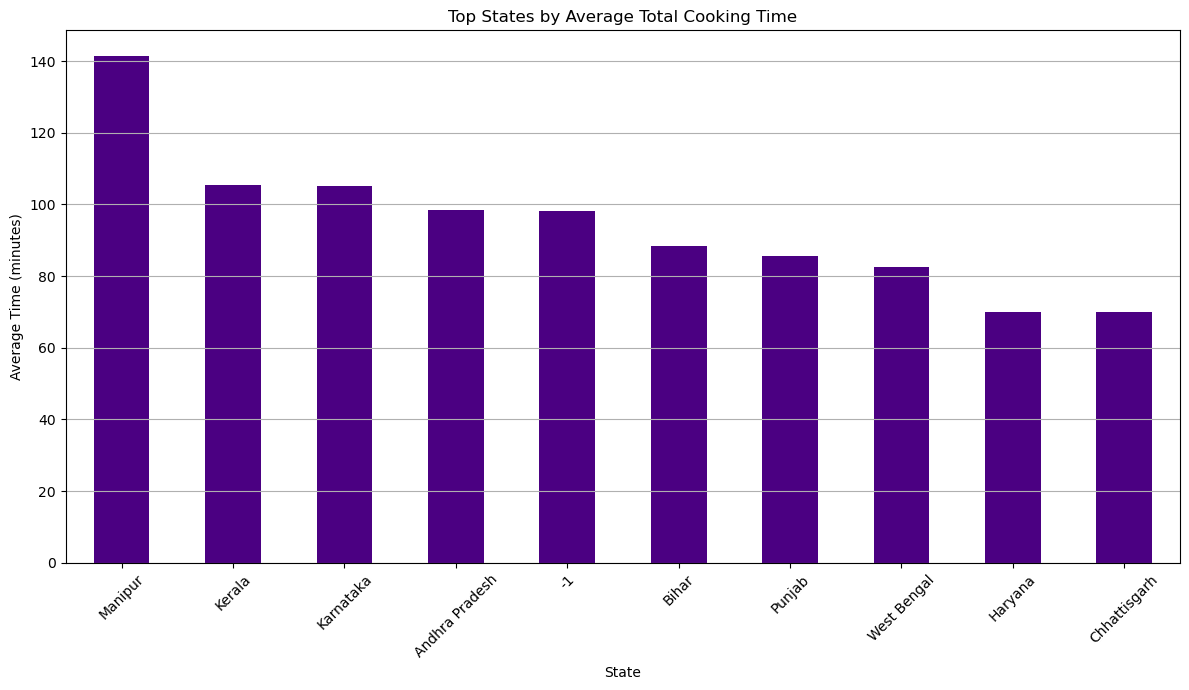

In [25]:
# Calculating average total time by state
avg_total_time_by_state = df.groupby('state')['total_time'].mean().sort_values(ascending=False).head(10)

# Plotting the top states by average total time
plt.figure(figsize=(12, 7))
avg_total_time_by_state.plot(kind='bar', color='indigo')
plt.title('Top States by Average Total Cooking Time')
plt.xlabel('State')
plt.ylabel('Average Time (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


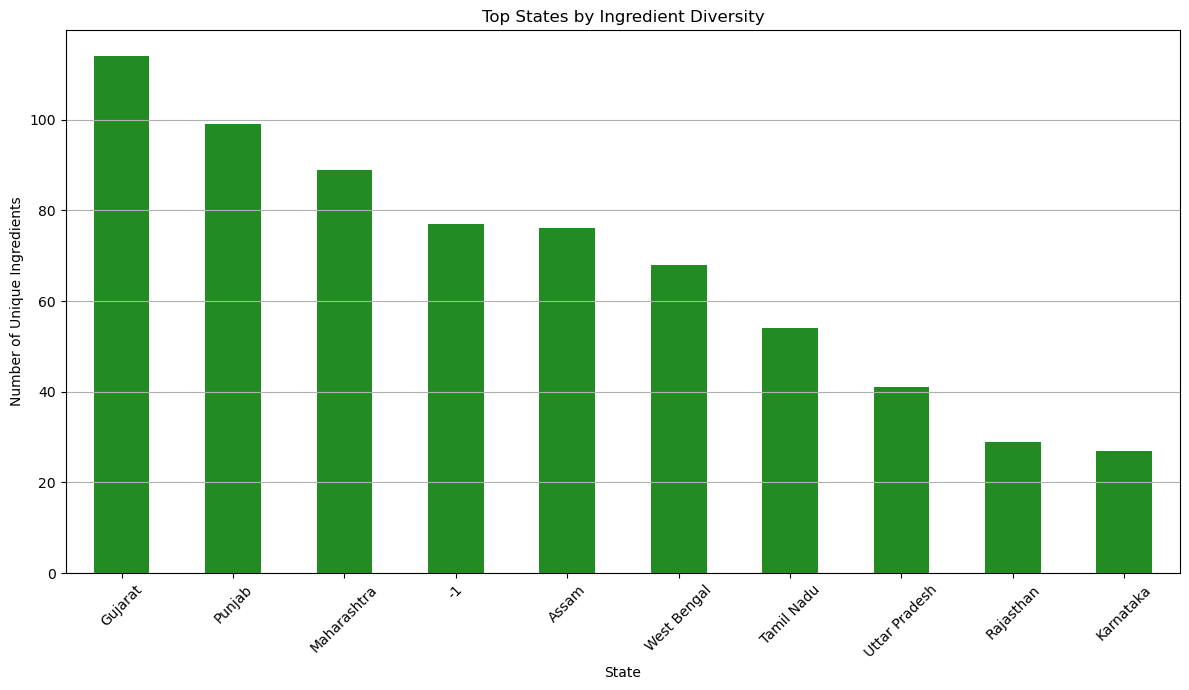

In [26]:
# Calculating the number of unique ingredients used by each state
ingredient_diversity_by_state = state_ingredients.apply(len).sort_values(ascending=False).head(10)

# Plotting the top states by ingredient diversity
plt.figure(figsize=(12, 7))
ingredient_diversity_by_state.plot(kind='bar', color='forestgreen')
plt.title('Top States by Ingredient Diversity')
plt.xlabel('State')
plt.ylabel('Number of Unique Ingredients')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


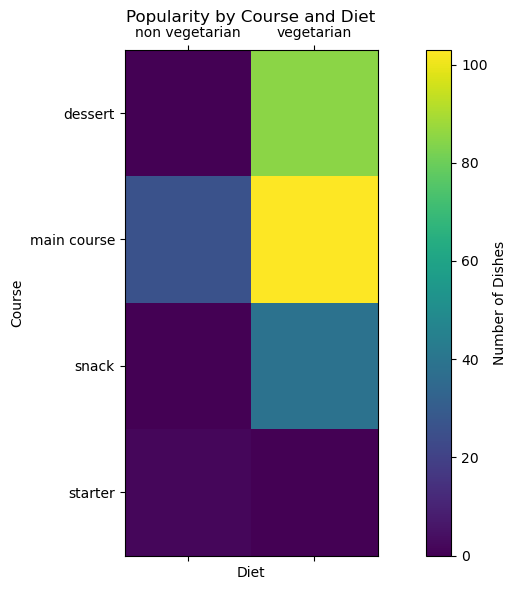

In [27]:
# Grouping by course and diet to get the counts
course_diet_matrix = df.groupby(['course', 'diet']).size().unstack().fillna(0)

# Using Matplotlib to visualize the interplay between course and diet
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(course_diet_matrix, cmap='viridis')
plt.title('Popularity by Course and Diet', pad=20)
plt.xlabel('Diet')
plt.ylabel('Course')
plt.xticks(range(len(course_diet_matrix.columns)), course_diet_matrix.columns)
plt.yticks(range(len(course_diet_matrix.index)), course_diet_matrix.index)
plt.colorbar(cax, label='Number of Dishes')
plt.tight_layout()

plt.show()


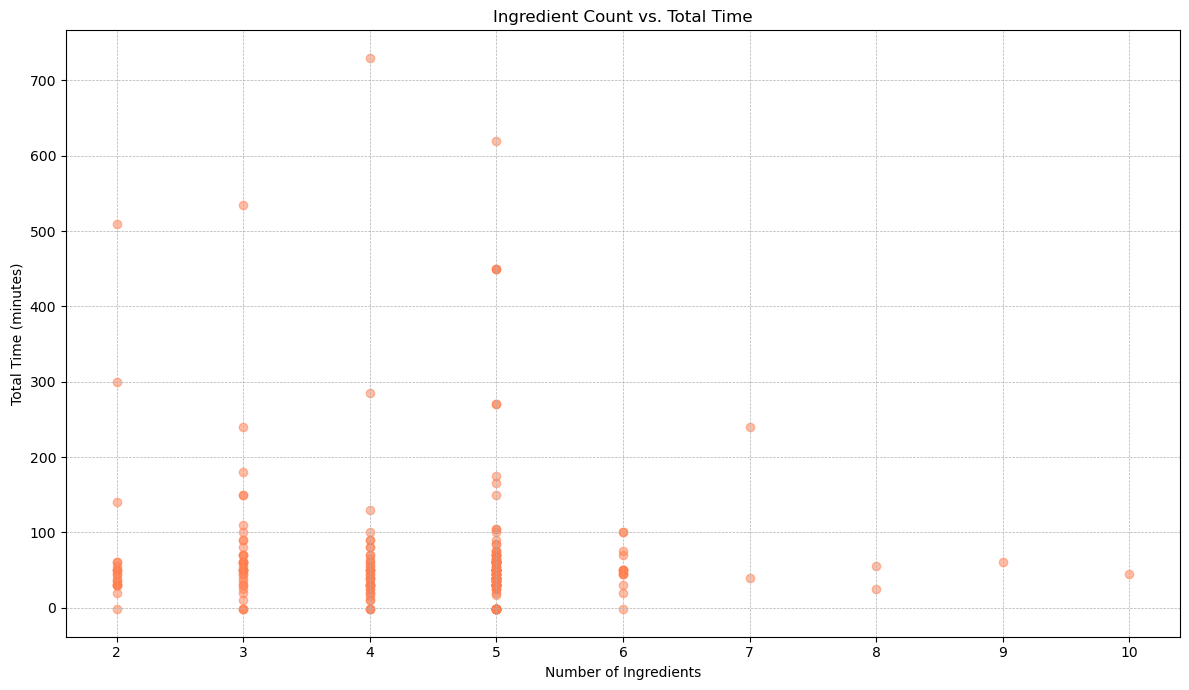

In [28]:
# Plotting scatter plot between ingredient count and total time
plt.figure(figsize=(12, 7))
plt.scatter(df['ingredient_count'], df['total_time'], color='coral', alpha=0.5)
plt.title('Ingredient Count vs. Total Time')
plt.xlabel('Number of Ingredients')
plt.ylabel('Total Time (minutes)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


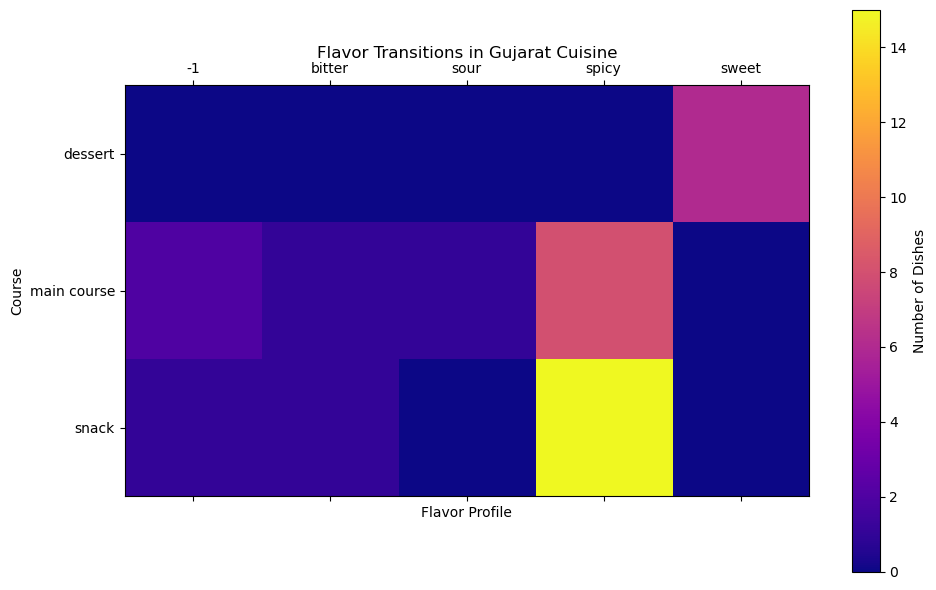

In [29]:
# Filtering dishes from Gujarat
gujarat_dishes = df[df['state'] == 'Gujarat']

# Creating a flavor transition matrix for Gujarat
flavor_transitions = gujarat_dishes.groupby(['course', 'flavor_profile']).size().unstack().fillna(0)

# Using Matplotlib to visualize flavor transitions within Gujarat's cuisine
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(flavor_transitions, cmap='plasma')
plt.title('Flavor Transitions in Gujarat Cuisine', pad=20)
plt.xlabel('Flavor Profile')
plt.ylabel('Course')
plt.xticks(range(len(flavor_transitions.columns)), flavor_transitions.columns)
plt.yticks(range(len(flavor_transitions.index)), flavor_transitions.index)
plt.colorbar(cax, label='Number of Dishes')
plt.tight_layout()

plt.show()


In [30]:
# Selecting a few common ingredients for analysis
selected_ingredients = ['chocolate', 'curd', 'chili', 'rice', 'sugar']

# Creating a DataFrame to store flavor profiles influenced by these ingredients
ingredient_flavor_df = pd.DataFrame(index=selected_ingredients, columns=df['flavor_profile'].unique())

# Filling the DataFrame
for ingredient in selected_ingredients:
    flavors = df[df['ingredients'].str.contains(ingredient, case=False)]['flavor_profile'].value_counts()
    ingredient_flavor_df.loc[ingredient] = flavors

ingredient_flavor_df.fillna(0, inplace=True)
ingredient_flavor_df


,sweet,spicy,bitter,-1,sour
chocolate,0.0,0.0,0.0,0.0,0.0
curd,3.0,1.0,0.0,4.0,0.0
chili,1.0,13.0,1.0,1.0,0.0
rice,22.0,21.0,0.0,8.0,0.0
sugar,45.0,7.0,0.0,1.0,1.0


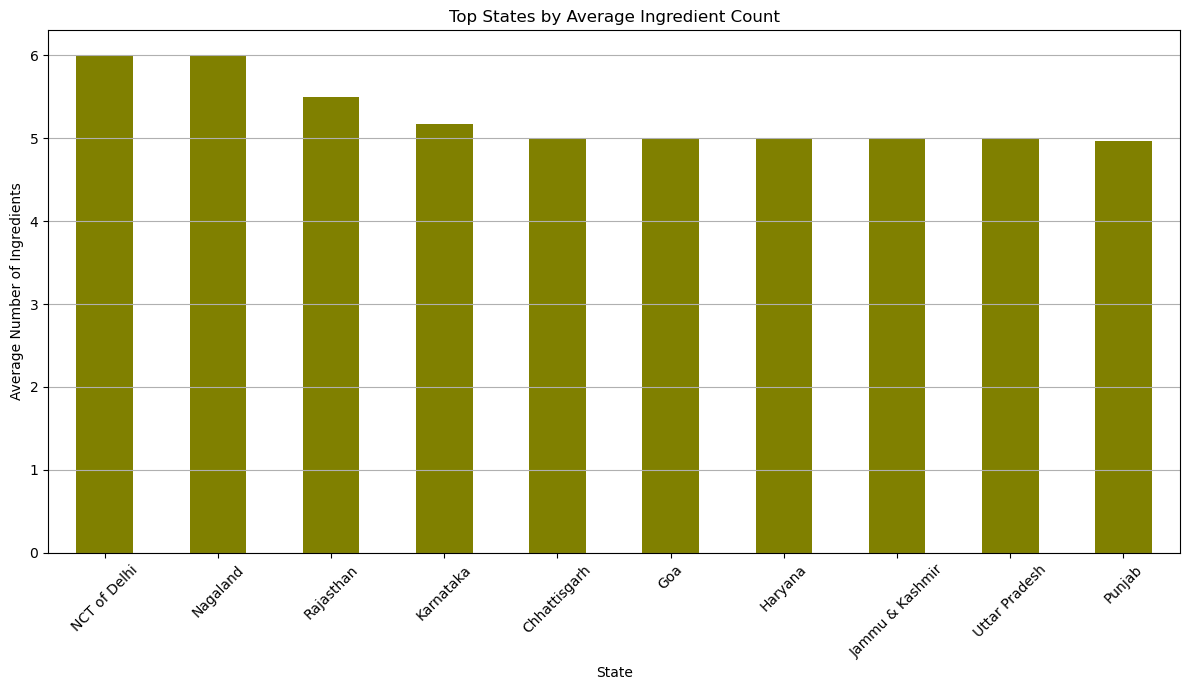

In [31]:
# Calculating average ingredient count by state
avg_ingredient_by_state = df.groupby('state')['ingredient_count'].mean().sort_values(ascending=False).head(10)

# Plotting the top states by average ingredient count
plt.figure(figsize=(12, 7))
avg_ingredient_by_state.plot(kind='bar', color='olive')
plt.title('Top States by Average Ingredient Count')
plt.xlabel('State')
plt.ylabel('Average Number of Ingredients')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


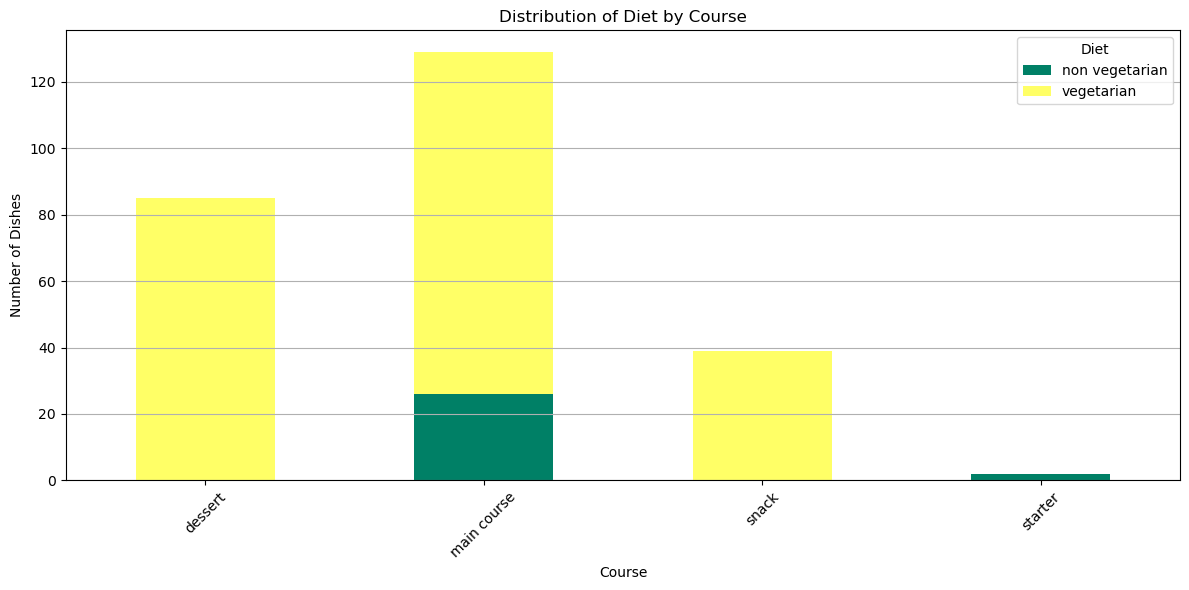

In [32]:
# Grouping by course and diet to get the counts
course_diet_distribution = df.groupby(['course', 'diet']).size().unstack().fillna(0)

# Plotting the distribution of diet by course
course_diet_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='summer')
plt.title('Distribution of Diet by Course')
plt.xlabel('Course')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Diet')
plt.tight_layout()

plt.show()


In [33]:
from itertools import combinations

# Generating combinations of ingredients for each dish
df['ingredient_combinations'] = df['ingredients'].str.split(', ').apply(lambda x: list(combinations(x, 2)))

# Counting the combinations
ingredient_combinations_list = df['ingredient_combinations'].explode().tolist()
combination_counts = Counter(ingredient_combinations_list)

# Getting the top 10 most common ingredient combinations
top_combinations = pd.DataFrame(combination_counts.most_common(10), columns=['Ingredient Combination', 'Count'])
top_combinations


,Ingredient Combination,Count
0,"(garam masala, ginger)",8
1,"(sugar, ghee)",8
2,"(Chana dal, urad dal)",8
3,"(ghee, sugar)",7
4,"(jaggery, ghee)",6
5,"(curry leaves, mustard seeds)",6
6,"(milk, sugar)",6
7,"(sugar, cardamom)",6
8,"(ginger, curry leaves)",6
9,"(Rice flour, jaggery)",5


In [34]:
# Creating a DataFrame to store the count of flavor profiles influenced by the top ingredients
ingredient_flavor_matrix = pd.DataFrame(index=top_ingredients['Ingredient'], columns=df['flavor_profile'].unique())

# Filling the DataFrame
for ingredient in top_ingredients['Ingredient']:
    flavors = df[df['ingredients'].str.contains(ingredient, case=False)]['flavor_profile'].value_counts()
    ingredient_flavor_matrix.loc[ingredient] = flavors

ingredient_flavor_matrix.fillna(0, inplace=True)

# Calculating versatility as the number of non-zero entries in the flavor profile for each ingredient
ingredient_flavor_matrix['versatility'] = ingredient_flavor_matrix.apply(lambda row: sum(row > 0), axis=1)
most_versatile_ingredient = ingredient_flavor_matrix.sort_values(by='versatility', ascending=False).head(1)
most_versatile_ingredient


,sweet,spicy,bitter,-1,sour,versatility
Ingredient,,,,,,
sugar,45.0,7.0,0.0,1.0,1.0,4


In [35]:
# Grouping by state and flavor profile to get the counts
state_flavor_max = df.groupby('state')['flavor_profile'].value_counts().groupby(level=0).nlargest(1).reset_index(level=1, drop=True)

# Renaming for clarity
state_flavor_max = state_flavor_max.rename("Most Common Flavor Count").reset_index()
state_flavor_max


,state,flavor_profile,Most Common Flavor Count
0,-1,spicy,14
1,Andhra Pradesh,sweet,8
2,Assam,spicy,11
3,Bihar,spicy,2
4,Chhattisgarh,spicy,1
5,Goa,sweet,2
6,Gujarat,spicy,23
7,Haryana,spicy,1
8,Jammu & Kashmir,spicy,1
9,Karnataka,sweet,3


In [36]:
# Selecting a few common ingredients for analysis
selected_ingredients_diet = ['chicken', 'fish', 'beef', 'milk', 'paneer']

# Creating a DataFrame to store the count of diets influenced by these ingredients
ingredient_diet_df = pd.DataFrame(index=selected_ingredients_diet, columns=df['diet'].unique())

# Filling the DataFrame
for ingredient in selected_ingredients_diet:
    diets = df[df['ingredients'].str.contains(ingredient, case=False)]['diet'].value_counts()
    ingredient_diet_df.loc[ingredient] = diets

ingredient_diet_df.fillna(0, inplace=True)
ingredient_diet_df


,vegetarian,non vegetarian
chicken,0.0,9.0
fish,0.0,7.0
beef,1.0,0.0
milk,33.0,2.0
paneer,3.0,0.0


**Chicken:** Exclusively found in non-vegetarian dishes.

**Fish:** Similarly, found only in non-vegetarian dishes.

**Beef:** Interestingly, the dataset has beef listed in a vegetarian dish, which is likely an error in the dataset. Beef is traditionally a non-vegetarian ingredient.

**Milk:** Predominantly in vegetarian dishes but appears in a couple of non-vegetarian dishes as well. This suggests that milk is versatile and can be used in a variety of dishes.

**Paneer:** Exclusively in vegetarian dishes, given that it's a type of cheese.

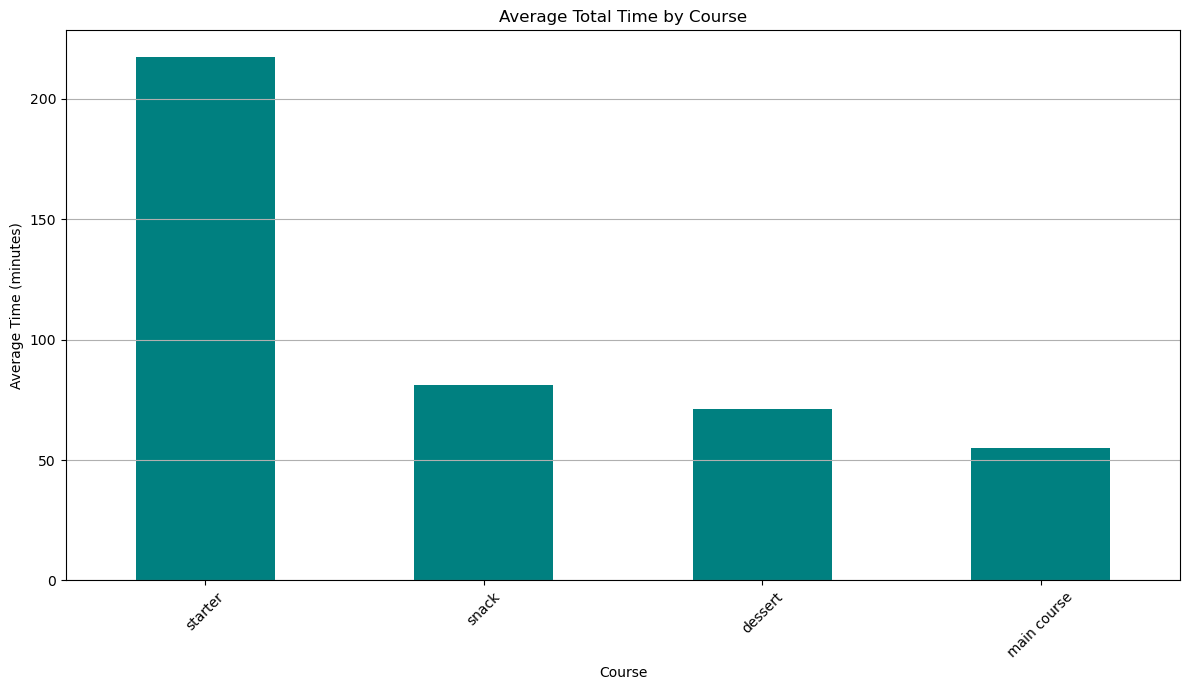

In [37]:
# Calculating average total time by course
avg_time_by_course = df.groupby('course')['total_time'].mean().sort_values(ascending=False)

# Plotting the average times by course
plt.figure(figsize=(12, 7))
avg_time_by_course.plot(kind='bar', color='teal')
plt.title('Average Total Time by Course')
plt.xlabel('Course')
plt.ylabel('Average Time (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [38]:
# Splitting ingredients and counting their occurrences based on diet
veg_ingredients = df[df['diet'] == 'vegetarian']['ingredients'].str.split(', ').explode().value_counts()
non_veg_ingredients = df[df['diet'] == 'non vegetarian']['ingredients'].str.split(', ').explode().value_counts()

# Getting the top 10 ingredients for both diets
top_veg_ingredients = veg_ingredients.head(10)
top_non_veg_ingredients = non_veg_ingredients.head(10)

top_veg_ingredients, top_non_veg_ingredients


(sugar           43
 curry leaves    25
 ghee            25
 garam masala    24
 ginger          23
 jaggery         18
 urad dal        17
 Rice flour      15
 milk            15
 tomato          12
 Name: ingredients, dtype: int64,
 mustard oil            7
 ginger                 6
 garam masala powder    4
 Chicken                4
 fish                   3
 turmeric               3
 garam masala           3
 tomatoes               3
 bay leaf               3
 chillies               3
 Name: ingredients, dtype: int64)

**Vegetarian Dishes:**

* Sugar: 43 occurrences
* Curry leaves and Ghee: 25 occurrences each
* Garam masala: 24 occurrences
* Ginger: 23 occurrences
* Jaggery: 18 occurrences
* Urad dal: 17 occurrences
* Rice flour and Milk: 15 occurrences each
* Tomato: 12 occurrences

**Non-Vegetarian Dishes:**

* Mustard oil: 7 occurrences
* Ginger: 6 occurrences
* Garam masala powder and Chicken: 4 occurrences each
* Fish, Turmeric, Garam masala, Tomatoes, Bay leaf, and Chillies: 3 occurrences each

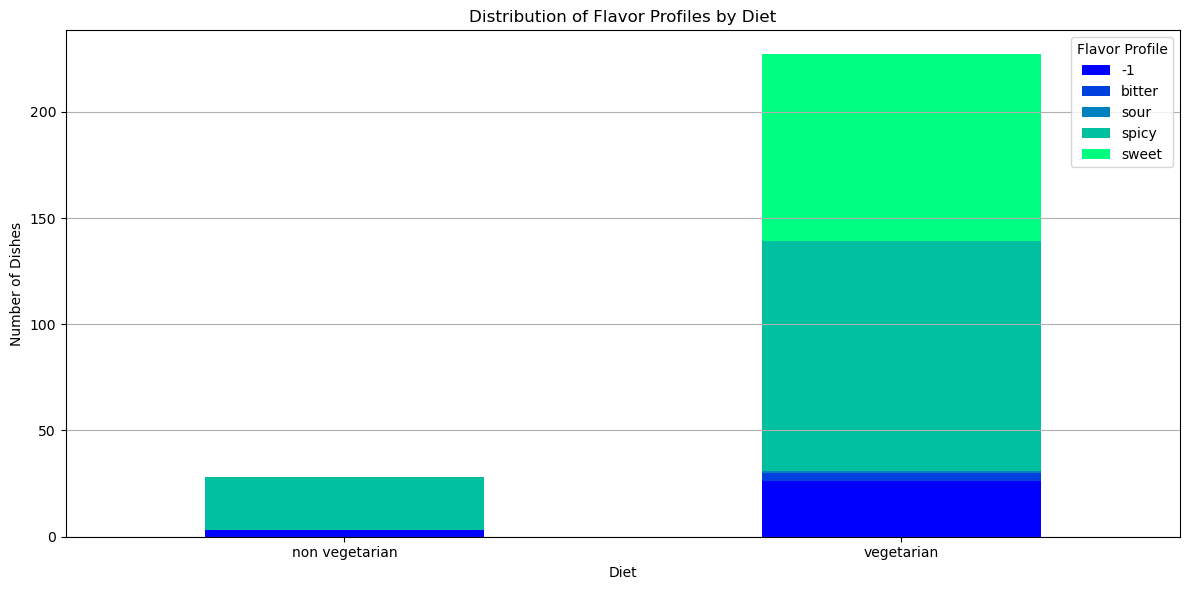

In [39]:
# Grouping by diet and flavor profile to get the counts
diet_flavor_distribution = df.groupby(['diet', 'flavor_profile']).size().unstack().fillna(0)

# Plotting the distribution of flavor profiles by diet
diet_flavor_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='winter')
plt.title('Distribution of Flavor Profiles by Diet')
plt.xlabel('Diet')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Flavor Profile')
plt.tight_layout()

plt.show()


In [40]:
# Checking the column names to confirm
df.columns


Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region', 'img_url', 'total_time',
       'ingredient_count', 'ingredient_combinations'],
      dtype='object')

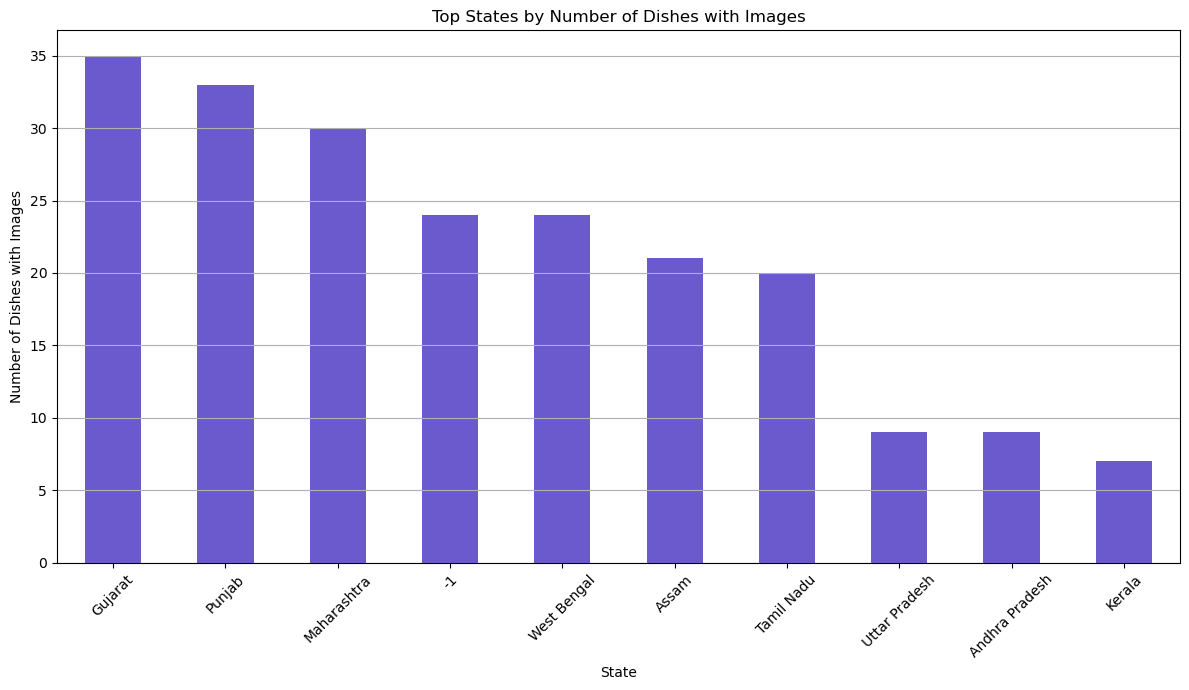

In [41]:
# Checking if dishes have associated image URLs using the correct column
df['has_image'] = df['img_url'].apply(lambda x: 0 if pd.isnull(x) or x.strip() == "" else 1)

# Grouping by state to get counts of dishes with images
state_image_counts = df.groupby('state')['has_image'].sum().sort_values(ascending=False).head(10)

# Plotting the top states based on number of dishes with images
plt.figure(figsize=(12, 7))
state_image_counts.plot(kind='bar', color='slateblue')
plt.title('Top States by Number of Dishes with Images')
plt.xlabel('State')
plt.ylabel('Number of Dishes with Images')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()
